In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
from snowflake.snowpark import Session

In [2]:
load_dotenv()

True

In [3]:
ACCOUNT = os.getenv('ACCOUNT')
USER = os.getenv('SP_USER')
PASSWORD = os.getenv('PASSWORD')
ROLE = os.getenv('ROLE')
WAREHOUSE = os.getenv('WAREHOUSE')
DATABASE = os.getenv('DATABASE')
SCHEMA = os.getenv('SCHEMA')

print(ACCOUNT, USER, ROLE, WAREHOUSE, DATABASE, SCHEMA)

hum.us-east-2.aws ericatuva UVARND UVARND_WH CORE CLIENT


In [4]:
connection_parameters = {
    'account': os.getenv('ACCOUNT'),
    'user': USER,
    'password': os.getenv('PASSWORD'),
    'role': 'RUP',
    #'role': os.getenv('ROLE'),
    'warehouse': os.getenv('WAREHOUSE'),
    'database': os.getenv('DATABASE'),
    'schema': os.getenv('SCHEMA')
}

In [5]:
test_session = Session.builder.configs(connection_parameters).create()

In [6]:
events_query = """
SELECT 
    e.visitor_id
    , COUNT(DISTINCT e.id) AS events
    , COUNT(DISTINCT CASE WHEN e.event = 'cite' THEN e.id END) AS cite
    , COUNT(DISTINCT CASE WHEN e.event = 'pageview' THEN e.id END) AS page_view
    , COUNT(DISTINCT CASE WHEN e.event = 'pdf-click' THEN e.id END) AS pdf_click
    , COUNT(DISTINCT CASE WHEN e.event = 'post-read-start' THEN e.id END) AS post_read_start
    , COUNT(DISTINCT CASE WHEN e.event = 'post-read-mid' THEN e.id END) AS post_read_mid
    , COUNT(DISTINCT CASE WHEN e.event = 'post-read-end' THEN e.id END) AS post_read_end
FROM event e
WHERE DATE_TRUNC('year', e.day) = DATE('2022-01-01')
AND e.visitor_id IS NOT NULL
GROUP BY 1
ORDER BY 1
"""

In [7]:
print('querying...')
query_results = test_session.sql(events_query).collect()
print('query done')
test_session.close()
print('session closed')

querying...
query done
session closed


In [8]:
# convert to pandas df
query_json = list(map(lambda x: x.as_dict(), query_results))
query_df = pd.DataFrame(query_json)
query_df.to_csv('hist_data.csv', index = 0)
# query_df = pd.read_csv('events_data.csv')

In [2]:
query_df = pd.read_csv('hist_data.csv')

In [3]:
query_df

,VISITOR_ID,EVENTS,CITE,PAGE_VIEW,PDF_CLICK,POST_READ_START,POST_READ_MID,POST_READ_END
0,00000404-5bf6-4798-89d8-1592758d661e,3,0,3,0,0,0,0
1,000008b9-45d5-4ed2-8cfe-2463853d5640,4,0,1,0,1,1,1
2,00001624-b501-4b87-8cd6-a90760e47df8,4,0,1,0,1,1,1
3,00001e6f-ce60-4bf4-b356-4ab63181ccc3,4,0,1,0,1,1,1
4,00002124-5ca5-4a6f-9fd9-839062c866b3,8,0,2,0,2,2,2
...,...,...,...,...,...,...,...,...
1894585,ffffd7ea-c335-412e-a6f9-1676e2533cd5,12,0,3,0,3,3,3
1894586,ffffd8d1-e23e-49d4-9a1d-f24244edaeea,4,0,1,0,1,1,1
1894587,ffffe48e-5fde-4163-8e92-5d0d95bbc91a,1,0,1,0,0,0,0
1894588,ffffe76a-5434-4064-9cc3-274504915aeb,5,0,2,0,1,1,1


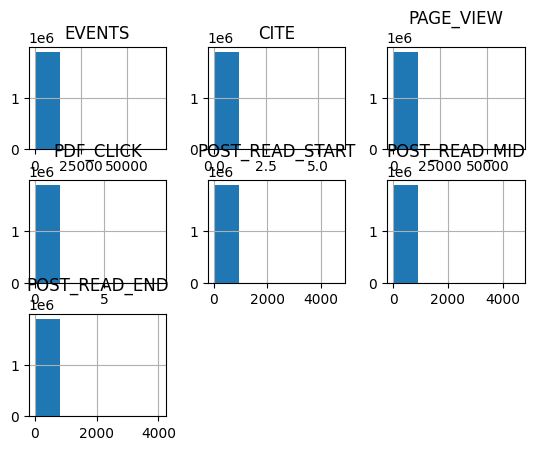

In [4]:
hist_df = query_df[[
    'EVENTS', 
    'CITE', 
    'PAGE_VIEW', 
    'PDF_CLICK',
    'POST_READ_START',
    'POST_READ_MID',
    'POST_READ_END'
]]

hist = hist_df.hist(bins = 5)

<AxesSubplot: ylabel='Density'>

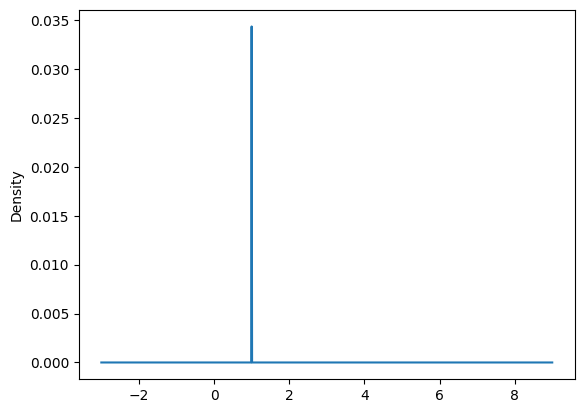

In [6]:
hist_df['CITE'].plot.kde()